__This is an illustrative and step-by-step walkthrough of how to build a CNN for image recogntion for Cifar 10 dataset__

__The order of steps is as follows:__

1. Load, epxlore and standardize the data
2. Build the model
3. Train the model on the training dataset
4. Evaluate the model on the test data

* Use data augmentation to improve the final accuracy of the model

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
import numpy as np
print(tf.__version__)

import os
os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"

2025-05-26 19:39:54.607727: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-26 19:39:54.625591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748302794.647313 2565513 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748302794.653891 2565513 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748302794.669893 2565513 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

2.19.0


##### Load and scale the dataset

In [4]:
cifar10 = tf.keras.datasets.cifar10

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Scale the input images to expedite the network training
train_images = train_images / 255.0
test_images = test_images / 255.0

# train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
# test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [3]:
print("train_images.shape:", train_images.shape)
print(test_images.shape)

train_images.shape: (50000, 32, 32, 3)
(10000, 32, 32, 3)


### Attempt 1: The model architecture
The model architecture that we will use as follows:

1. An input layer, 
2. Three convolutional layers, a max pooling layer,
4. A flatten layer, and 
5. Two dense layers.
6. The last layer is the output layer with 10 neurons, one for each class.
7. Actiation functions in all layers are Relu, except in the last layer, the activation is softmax for multicalss classification.
8. Loss will be sparse categorical cross entropy, and recorded metric will be accuracy

In [ ]:
# Model building 

# Input layer
model_input = Input(shape=(train_images[0].shape))

# Convolution block 1
interm_out = Conv2D(32, (3, 3), activation='relu')(model_input)
interm_out = Conv2D(64, (3, 3), activation='relu')(interm_out)
interm_out = Conv2D(64, (3, 3), activation='relu')(interm_out)
# interm_out = MaxPooling2D((2, 2))(interm_out)
interim_out = Flatten()(interm_out)

# Clasification block
interim_out = Dense(512, activation='relu')(interim_out)
final_out = Dense(10, activation='softmax')(interim_out)

# Linking up the model input and output in the model object
model = Model(model_input, final_out)

In [4]:
# Setting up the model training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

BATHCH_SIZE = 128

train_data = train_data.batch(BATHCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(BATHCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Training the model
fit_stats = model.fit(train_data, epochs=5)

Epoch 1/5


I0000 00:00:1748209997.635905 2515516 service.cc:152] XLA service 0x734d2c009900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748209997.635960 2515516 service.cc:160]   StreamExecutor device (0): Quadro RTX 6000, Compute Capability 7.5
I0000 00:00:1748209997.635968 2515516 service.cc:160]   StreamExecutor device (1): Quadro RTX 6000, Compute Capability 7.5
I0000 00:00:1748209997.635973 2515516 service.cc:160]   StreamExecutor device (2): Quadro RTX 6000, Compute Capability 7.5
I0000 00:00:1748209997.635977 2515516 service.cc:160]   StreamExecutor device (3): Quadro RTX 6000, Compute Capability 7.5
2025-05-25 17:53:17.680374: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748209997.881841 2515516 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-25 17:53:18.451400: I external/local_xla/xla/service/gpu/autotun

 12/469 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4201 - loss: 1.6356

I0000 00:00:1748210002.912740 2515516 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8068 - loss: 0.5423

2025-05-25 17:53:30.035922: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.6 = (f32[96,64,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[96,1,28,28]{3,2,1,0} %bitcast.1983, f32[64,1,3,3]{3,2,1,0} %bitcast.1790, f32[64]{0} %bitcast.2173), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/conv2d_2_1/convolution" source_file="/nfs/nfs9/home/nobackup/parishar/my_own_python/deep_learning_env/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-25 17:53:30.207232: I external/local_xla/xla/service/gpu/autotuning/conv_algorit

469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8071 - loss: 0.5417
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9059 - loss: 0.2528
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9314 - loss: 0.1868
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9502 - loss: 0.1380
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9636 - loss: 0.0994


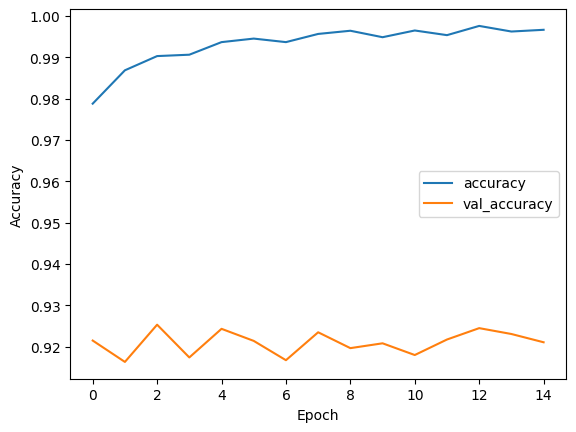

In [14]:
# Plotting the model performance 
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
model.evaluate(test_data)

2025-05-25 17:54:14.006956: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.6 = (f32[128,64,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,1,28,28]{3,2,1,0} %bitcast.500, f32[64,1,3,3]{3,2,1,0} %bitcast.507, f32[64]{0} %bitcast.509), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/conv2d_2_1/convolution" source_file="/nfs/nfs9/home/nobackup/parishar/my_own_python/deep_learning_env/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-25 17:54:14.203397: I external/local_xla/xla/service/gpu/autotuning/conv_algorith

75/79 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9065 - loss: 0.3388

2025-05-25 17:54:16.131622: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.6 = (f32[16,64,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,1,28,28]{3,2,1,0} %bitcast.500, f32[64,1,3,3]{3,2,1,0} %bitcast.507, f32[64]{0} %bitcast.509), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/conv2d_2_1/convolution" source_file="/nfs/nfs9/home/nobackup/parishar/my_own_python/deep_learning_env/lib/python3.11/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-25 17:54:16.232649: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9065 - loss: 0.3382


[0.32839012145996094, 0.9071000218391418]

__Results of experiment 1 & Improvements__

5 epochs - The test and validation set accuracy in the first experiment is ~92%.
15 epochs - Een after 15 epochs, the validation accuracy did not improve beyond 92%. The train set accuracy reached 99% - this indicates that the model is likely overfitting the training set. In this particular, configuration, it's better to train the data only upto 5 epochs (to prevent overfitting).

Now, let's try to see if the accuracy can be improved by
1. Using more feature maps in the last convolution layer.
2. Using data augmentation.

In [8]:
# Model building 

# Input layer
model_input = Input(shape=(train_images[0].shape))

# Convolution block 1
interm_out = Conv2D(32, (3, 3), strides = 2, activation='relu')(model_input)
interm_out = Conv2D(64, (3, 3), strides = 2, activation='relu')(interm_out)

# Convolution block 2
interm_out = Conv2D(128, (3, 3), activation='relu')(model_input)
interim_out = Flatten()(interm_out)

# Clasification block
interim_out = Dense(128, activation='relu')(interim_out)
interm_out = Dropout(0.1)(interim_out)
final_out = Dense(10, activation='softmax')(interim_out)

# Linking up the model input and output in the model object
model = Model(model_input, final_out)

# Setting up the model training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
fit_stats = model.fit(train_data, epochs=5)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.7971 - loss: 0.5837
Epoch 2/5


: 

__Observation:__ We note that, by increasing the feature maps, don't really improve the accuracy. So, let's try data augmentation as a last attempt.

In [7]:
# Create data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),  # Rotate by up to 20% (0.2 * 2π radians)
    tf.keras.layers.RandomZoom(0.1),      # Zoom by up to 10%
    tf.keras.layers.RandomContrast(0.1),   # Adjust contrast by up to 10%
])

In [8]:
# Model building 

# Input layer
model_input = Input(shape=(train_images[0].shape))

# Apply data augmentation
interim_out = data_augmentation(model_input)

# Convolution block 1
interm_out = Conv2D(32, (3, 3), strides = 2, activation='relu')(interim_out)
interm_out = Conv2D(64, (3, 3), strides = 2, activation='relu')(interm_out)
interm_out = Conv2D(128, (3, 3), activation='relu')(model_input)
interim_out = MaxPooling2D((2, 2))(interm_out)
interim_out = Flatten()(interm_out)

# Clasification block
interim_out = Dense(128, activation='relu')(interim_out)
interm_out = Dropout(0.1)(interim_out)
final_out = Dense(10, activation='softmax')(interim_out)

# Linking up the model input and output in the model object
model = Model(model_input, final_out)

# Setting up the model training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

BATHCH_SIZE = 128

train_data = train_data.batch(BATHCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(BATHCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Training the model
fit_stats = model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5


I0000 00:00:1748210227.937825 2516933 service.cc:152] XLA service 0x75b25000ae10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748210227.937859 2516933 service.cc:160]   StreamExecutor device (0): Quadro RTX 6000, Compute Capability 7.5
I0000 00:00:1748210227.937863 2516933 service.cc:160]   StreamExecutor device (1): Quadro RTX 6000, Compute Capability 7.5
I0000 00:00:1748210227.937866 2516933 service.cc:160]   StreamExecutor device (2): Quadro RTX 6000, Compute Capability 7.5
I0000 00:00:1748210227.937870 2516933 service.cc:160]   StreamExecutor device (3): Quadro RTX 6000, Compute Capability 7.5
2025-05-25 17:57:07.966851: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748210228.137335 2516933 cuda_dnn.cc:529] Loaded cuDNN version 90300


 12/469 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3645 - loss: 1.7028

I0000 00:00:1748210231.841910 2516933 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8055 - loss: 0.5444 - val_accuracy: 0.8846 - val_loss: 0.3198
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9041 - loss: 0.2622 - val_accuracy: 0.8924 - val_loss: 0.2990
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9247 - loss: 0.2021 - val_accuracy: 0.8970 - val_loss: 0.2970
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9428 - loss: 0.1549 - val_accuracy: 0.8930 - val_loss: 0.3369
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9566 - loss: 0.1187 - val_accuracy: 0.8954 - val_loss: 0.3423


__Observation:__ We note that, by using data augmentation, don't really improve the accuracy. It indicates that about 91% could be the max accuracy that we can squeeze out of this dataset. Another way to think about this is that the images are very low resolution, just 28 * 28, so wiht such low resolution - maybe the CNN can only get 91% of accuracy.